In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data = pd.read_csv("aac_intakes_outcomes_address_income.csv", encoding="utf-8", low_memory=False)

In [3]:
data.head()

,age_upon_outcome,animal_id_outcome,date_of_birth,outcome_subtype,outcome_type,sex_upon_outcome,age_upon_outcome_(days),age_upon_outcome_(years),age_upon_outcome_age_group,outcome_datetime,...,intake_hour,intake_number,time_in_shelter,time_in_shelter_days,age_upon_intake_number,age_upon_intake_lentime,found_location_street,zipcode,income,population
0,10 years,A006100,2007-07-09 00:00:00,NaN,Return to Owner,Neutered Male,3650,10.0,"(7.5, 10.0]",2017-12-07 14:07:00,...,14,1.0,0 days 14:07:00.000000000,0.588194,10,years,Colony Creek And Hunters Trace,78758,"47,244","44,072"
1,7 years,A006100,2007-07-09 00:00:00,NaN,Return to Owner,Neutered Male,2555,7.0,"(5.0, 7.5]",2014-12-20 16:35:00,...,10,2.0,1 days 06:14:00.000000000,1.259722,7,years,8700 Research Blvd,78757,"62,992","21,310"
2,6 years,A006100,2007-07-09 00:00:00,NaN,Return to Owner,Neutered Male,2190,6.0,"(5.0, 7.5]",2014-03-08 17:10:00,...,14,3.0,1 days 02:44:00.000000000,1.113889,6,years,8700 Research,78757,"62,992","21,310"
3,10 years,A047759,2004-04-02 00:00:00,Partner,Transfer,Neutered Male,3650,10.0,"(7.5, 10.0]",2014-04-07 15:12:00,...,15,1.0,4 days 23:17:00.000000000,4.970139,10,years,NaN,NaN,NaN,NaN
4,16 years,A134067,1997-10-16 00:00:00,NaN,Return to Owner,Neutered Male,5840,16.0,"(15.0, 17.5]",2013-11-16 11:54:00,...,9,1.0,0 days 02:52:00.000000000,0.119444,16,years,12034 Research Blvd,78759,"74,379","38,891"


In [4]:
economic_factors = data[["animal_id_outcome", "zipcode", "animal_type"]]
economic_factors.head()

,animal_id_outcome,zipcode,animal_type
0,A006100,78758,Dog
1,A006100,78757,Dog
2,A006100,78757,Dog
3,A047759,NaN,Dog
4,A134067,78759,Dog


In [5]:
zipcode_income = data[["zipcode", "income"]].drop_duplicates()
zipcode_income.head()

,zipcode,income
0,78758,"47,244"
1,78757,"62,992"
3,NaN,NaN
4,78759,"74,379"
6,78751,"51,567"


In [6]:
economic_factors_clean = economic_factors.loc[(economic_factors["zipcode"] != None) & (economic_factors["zipcode"].str.isnumeric())]
economic_factors_groupZC = economic_factors_clean.groupby(["zipcode", "animal_type"])

In [7]:
economic_factors_groupZC = economic_factors_groupZC.count()
economic_factors_groupZC.head()

,,animal_id_outcome
zipcode,animal_type,
01223,Dog,1
01602,Dog,4
01604,Dog,1
01810,Dog,1
01960,Cat,1


In [8]:
economic_factors_groupZC.sort_values(by=["animal_type", "animal_id_outcome", "zipcode"], ascending=False, inplace=True)

In [9]:
economic_factors_groupZC = economic_factors_groupZC.reset_index()
#economic_factors_groupZC.loc[economic_factors_groupZC["animal_id_outcome"].astype("double") > 100]

In [10]:
economic_factors_groupZC = pd.merge(economic_factors_groupZC, zipcode_income, how="left", on="zipcode")
economic_factors_groupZC.head()

,zipcode,animal_type,animal_id_outcome,income
0,78701,Other,408,"102,112"
1,78704,Other,317,"62,283"
2,78753,Other,187,"41,489"
3,78745,Other,176,"56,778"
4,78744,Other,175,"43,871"


In [11]:
#economic_factors_groupZC.dropna()

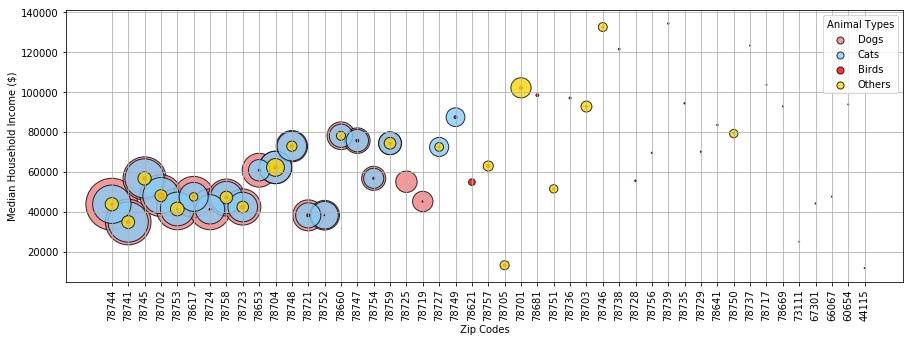

In [50]:
def getx_axis(dataset, animal_type):
    animal_type = dataset.loc[dataset["animal_type"]==animal_type]
    #print(len(animal_type["zipcode"]))
    return animal_type["zipcode"]

def gety_axis(dataset, animal_type):
    animal_type = dataset.loc[dataset["animal_type"]==animal_type]
    #print(len(animal_type["income"]))
    return animal_type["income"].str.replace(",", "").astype(float)

def getSize(dataset, animal_type):
    animal_type = dataset.loc[dataset["animal_type"]==animal_type]
    #print(len(animal_type["animal_id_outcome"]))
    return animal_type["animal_id_outcome"].replace(",", "").astype(float)

dogs_x = getx_axis(economic_factors_groupZC, "Dog")[0:20]
dogs_y = gety_axis(economic_factors_groupZC, "Dog")[0:20]
dogs_s = getSize(economic_factors_groupZC, "Dog")[0:20]
dogs = plt.scatter(dogs_x, dogs_y, c="lightcoral", edgecolors="black", alpha=0.8, s=dogs_s)

cats_x = getx_axis(economic_factors_groupZC, "Cat")[0:20]
cats_y = gety_axis(economic_factors_groupZC, "Cat")[0:20]
cats_s = getSize(economic_factors_groupZC, "Cat")[0:20]
cats = plt.scatter(cats_x, cats_y, c="lightskyblue", edgecolors="black", alpha=0.8, s=cats_s)

bird_x = getx_axis(economic_factors_groupZC, "Bird")
bird_y = gety_axis(economic_factors_groupZC, "Bird")
bird_s = getSize(economic_factors_groupZC, "Bird")
birds = plt.scatter(bird_x, bird_y, c="red", edgecolors="black", alpha=0.8, s=bird_s)

other_x = getx_axis(economic_factors_groupZC, "Other")[0:20]
other_y = gety_axis(economic_factors_groupZC, "Other")[0:20]
other_s = getSize(economic_factors_groupZC, "Other")[0:20]
others = plt.scatter(other_x, other_y, c="gold", edgecolors="black", alpha=0.8, s=other_s)

# Create a legend
lgnd = plt.legend((dogs, cats, birds, others), ("Dogs", "Cats", "Birds", "Others"), title="Animal Types")
for handle in lgnd.legendHandles:
    handle.set_sizes([50])

# Incorporate the other graph properties
plt.xlabel("Zip Codes")
plt.ylabel("Median Household Income ($)")
plt.xticks(rotation=90)
plt.grid()
plt.xlim()

plt.rcParams["figure.figsize"] = (15,5)
plt.savefig('EconomicFactors.png', papertype="letter", bbox_inches="tight")
#plt.savefig('EconomicFactors.png', dpi=150, papertype="letter", bbox_inches="tight")
plt.show()